# **Introduction** 

I will be performing exploratory data analysis on this dataset. This dataset was obtained from a study conducted from 1958 to 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Objective of this project 
- To find out any correlation between survival rate and age
- Did the cancer patients have better survival chance as the year progresses?
- Did the number of positive axillary nodes affect survival rates?

First, let's import required packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import matplotlib.pyplot as plt # plotting
import seaborn as sns

Next, we will import the csv file comprising Haberman Cancer Survival Dataset

In [2]:
haberman = pd.read_csv('../input/haberman.csv/haberman.csv')

Get a quick view on the first 5 rows of dataset.

In [3]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check to see if there is any unknown values i.e. NaN, NULL, etc

In [4]:
haberman.isnull().values.any()

False

Change values in status: 1 to survived and 2 to dead for better readability. Achived through [pandas.dataframe.replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [5]:
haberman['status'] = haberman.status.replace([1,2], ['survived','dead'])

## Probability Density Function (PDF)
PDF describes the relative likelihood for a random variable to take on a given value. Here, PDF is a great way for us to see the proportion of datapoints in each variable. For instance, we will like to see the proportion of people's age in a dataset that survived Haberman cancer. Does age has an effect on survival chance? Let's see!

First, we have an overview of the dataset using [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

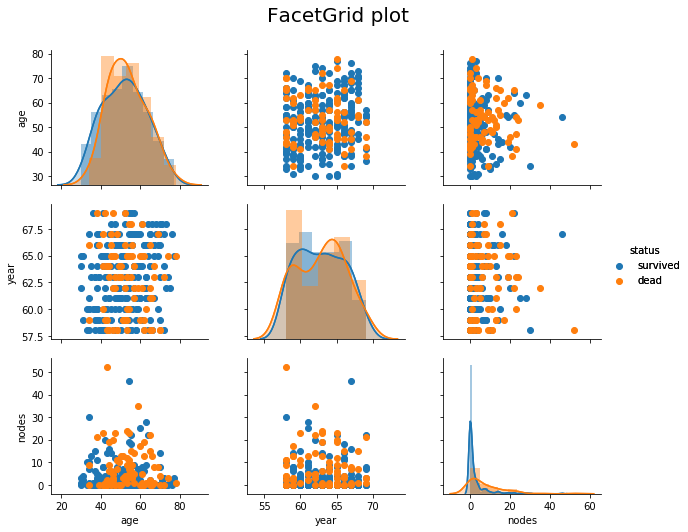

In [6]:
g = sns.pairplot(haberman, hue = 'status')
g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top=0.9);

## **Summary from diagram**
### What we can see from here:
- We will just need to look into the histograms for each variable that are linked to survival rates (age, nodes and year).
- For age, we observed people from the age of 30 to 40 has better survival rates. People from the age of 50 to 60 had a lower chance of survival while those above 60 has an equal chance.
- For year, we only observed higher survival rate between 1960 to 1963. Well, this does not tell us anything since there could changes in how data are collected or there are simply less haberman cancer patients admitted into the University of Chicago's Billings Hospital. 
- For nodes, we see a better survival rates with patients that have 2 or less positive axillary nodes. 

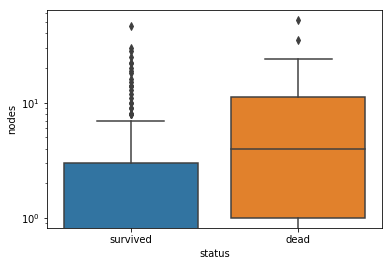

In [7]:
gg = sns.boxplot(x='status',y='nodes', data=haberman)
gg.set_yscale('log')

## Boxplot

Boxplot is also a great way to represent the distribution of qualitative data. What we see here is that people who survived have a range of 0-7 nodes, while those that died have 0-25 nodes. 

# Conclusion 
- We do not see any correlation between survival rate and age.
- We do not see any correlation between survival rate and year.
- We do see a correlation between survival rate and number of positive axillary nodes.